<a href="https://colab.research.google.com/github/angelahjhong/project-2/blob/main/CHD_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! git clone https://github.com/angelahjhong/project-2

Cloning into 'project-2'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 67 (delta 18), reused 10 (delta 10), pack-reused 40
Receiving objects: 100% (67/67), 777.01 KiB | 5.75 MiB/s, done.
Resolving deltas: 100% (34/34), done.


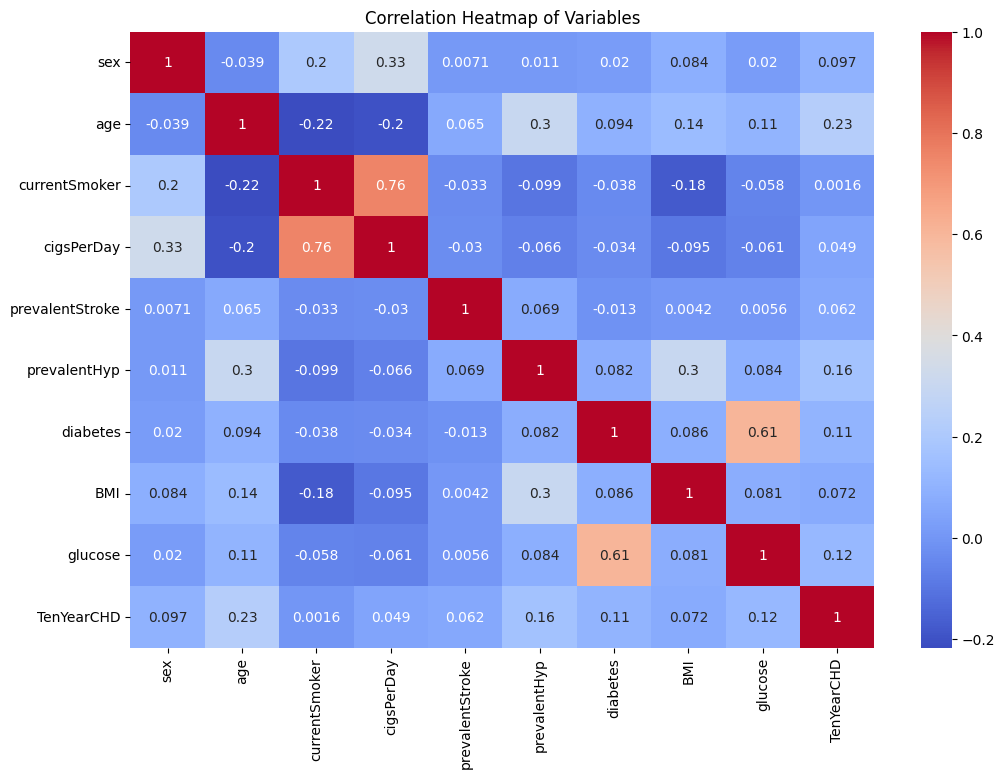

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv("/content/project-2/cleaned_train_binary.csv")
# created a correlation matrix to graph our heatmap to find a significant
# correlation between our datasets
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

train_data = pd.read_csv("/content/project-2/cleaned_train_binary.csv")
test_data = pd.read_csv("/content/project-2/cleaned_test_binary.csv")

vars = ['sex', 'age', 'currentSmoker', 'cigsPerDay', 'prevalentStroke',
                 'prevalentHyp', 'diabetes', 'BMI', 'glucose', 'TenYearCHD']

train_data = train_data[vars]
test_data = test_data[vars]

# pulling our variables
train_data = pd.get_dummies(train_data, columns=['sex', 'currentSmoker',
                                                 'prevalentStroke', 'prevalentHyp', 'diabetes'])
test_data = pd.get_dummies(test_data, columns=['sex', 'currentSmoker',
                                               'prevalentStroke', 'prevalentHyp', 'diabetes'])

# in this code we are dropping the TenYearCHD variable because this is what we are running our predictions against
X_train = train_data.drop(columns=['TenYearCHD'])
y_train = train_data['TenYearCHD']
X_test = test_data.drop(columns=['TenYearCHD'])
y_test = test_data['TenYearCHD']

# initializing our models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(max_depth=3)  # Create a regression object
knn_model = KNeighborsRegressor()

# training models calling the tree funcs
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)  # Fit the regression
knn_model.fit(X_train, y_train)

# running our predictions based on our pull variable array
linear_pred = linear_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# calculating our R^2 scores using a built in function
linear_rsq = r2_score(y_test, linear_pred)
decision_tree_rsq = r2_score(y_test, decision_tree_pred)
knn_rsq = r2_score(y_test, knn_pred)

# calculating the RMSE using a built in function
linear_rmse = mean_squared_error(y_test, linear_pred, squared=False )
decision_tree_rmse = mean_squared_error(y_test, decision_tree_pred, squared=False)
knn_rmse = mean_squared_error(y_test, knn_pred, squared=False)

print("Linear Regression rsq:", linear_rsq)
print("Decision Tree Regression rsq:", decision_tree_rsq)
print("K-Nearest Neighbors Regression rsq:", knn_rsq)

print("\nLinear Regression rmse:", linear_rmse)
print("Decision Tree Regression rmse:", decision_tree_rmse)
print("K-Nearest Neighbors Regression rmse:", knn_rmse)

Linear Regression rsq: 0.08944393608080903
Decision Tree Regression rsq: 0.03562751031856948
K-Nearest Neighbors Regression rsq: -0.07517052147477288

Linear Regression rmse: 0.3389543263724163
Decision Tree Regression rmse: 0.3488271201718383
K-Nearest Neighbors Regression rmse: 0.3683210248662036
